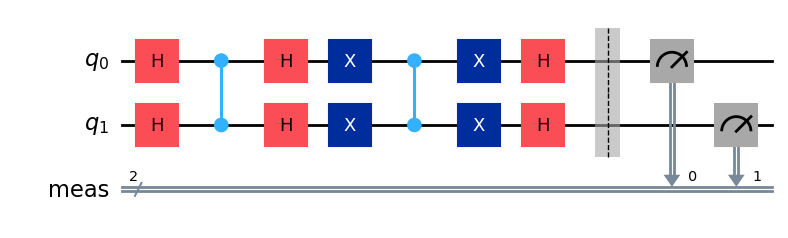

{'11': 1000}


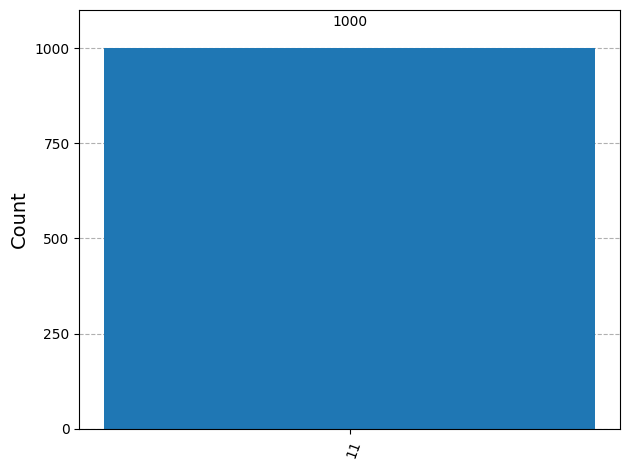

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

def grover_oracle(): #Mark |11> state for example
	oracle = QuantumCircuit(2)
	oracle.cz(0, 1) 	#Marks |11> state by flipping the phase
	return oracle

def diffusion_operator():
	diffusion = QuantumCircuit(2)
	diffusion.h([0, 1])
	diffusion.x([0, 1])
	diffusion.cz(0, 1)
	diffusion.x([0, 1])
	diffusion.h([0, 1])
	return diffusion

qc	= QuantumCircuit(2)
qc.h([0, 1])
qc = qc.compose(grover_oracle())
qc = qc.compose(diffusion_operator())
qc.measure_all([0, 1],[0,1])

display(qc.draw('mpl'))

simulator = Aer.get_backend('aer_simulator')
job = simulator.run(qc,shots=1000)
result = job.result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)
